# Basic Data Exploration & Implementing Supervised ML Algorithms

**Dataset Used** : [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

## Learning Objectives:

1. Master pandas, numpy, and matplotlib through real-world EDA
2. Understand feature scaling and its importance
3. Implement and compare supervised ML algorithms
4. Learn proper model evaluation techniques
5. Gain practical ML workflow experience

## 0. Importing libraries and loading data

### 0.1. Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

### 0.2. Loading and taking first look at the data

In [2]:
# load data
df = pd.read_csv('WineQT.csv')

# quick exploration
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1143, 13)
Rows: 1143, Columns: 13

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
print("Dataset Info:")
print("="*50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
print("Statistical Summary:")
print("="*50)
df.describe()

Statistical Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


**Note**: We can drop the `Id` column from the dataframe as it is providing no information.

In [5]:
df.drop('Id', axis=1, inplace=True)

## 1. Basic Data Exploration

### 1.1. Target Variable Analysis

Here `quality` is the target variable as we are going to predict it.

In [6]:
print("Exploring Target Variable - Wine Quality:")
print("="*50)

print(f"Number of unique quality ratings: {len(df['quality'].unique())}")
print(f"Quality range: {df['quality'].min()} to {df['quality'].max()}")
print("\nDistribution of wine quality ratings:")
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)

# Calculate percentages
quality_percentages = (quality_counts / len(df) * 100).round(1)
print("\nPercentage distribution:")
for quality, percentage in quality_percentages.items():
    print(f"Quality {quality}: {percentage}%")

Exploring Target Variable - Wine Quality:
Number of unique quality ratings: 6
Quality range: 3 to 8

Distribution of wine quality ratings:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

Percentage distribution:
Quality 3: 0.5%
Quality 4: 2.9%
Quality 5: 42.3%
Quality 6: 40.4%
Quality 7: 12.5%
Quality 8: 1.4%


### 1.2. Checking for Missing Values

Presence of missing values in a dataset is unwanted. As it may lead to incorrect model predictions. Thus we have to address if there are any missing values present in the dataset.

In [7]:
print("Checking for Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nGreat! No missing values found in the dataset.")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")

Checking for Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Great! No missing values found in the dataset.


### 1.3. Univariate Analysis - Target Distribution

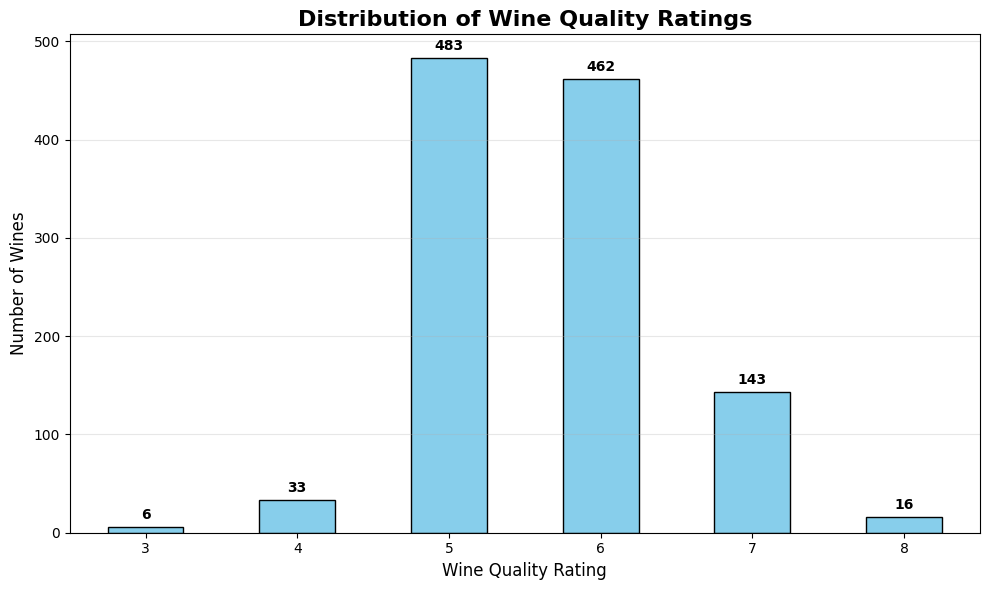

Key Insight: Most wines are rated 5-6 (average quality), with very few excellent (8) or poor (3) wines.


In [8]:
# Distribution of wine quality
plt.figure(figsize=(10, 6))
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Wine Quality Rating', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(df['quality'].value_counts().sort_index()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Key Insight: Most wines are rated 5-6 (average quality), with very few excellent (8) or poor (3) wines.")

### 1.4. Feature Distributions

<Figure size 1600x1200 with 0 Axes>

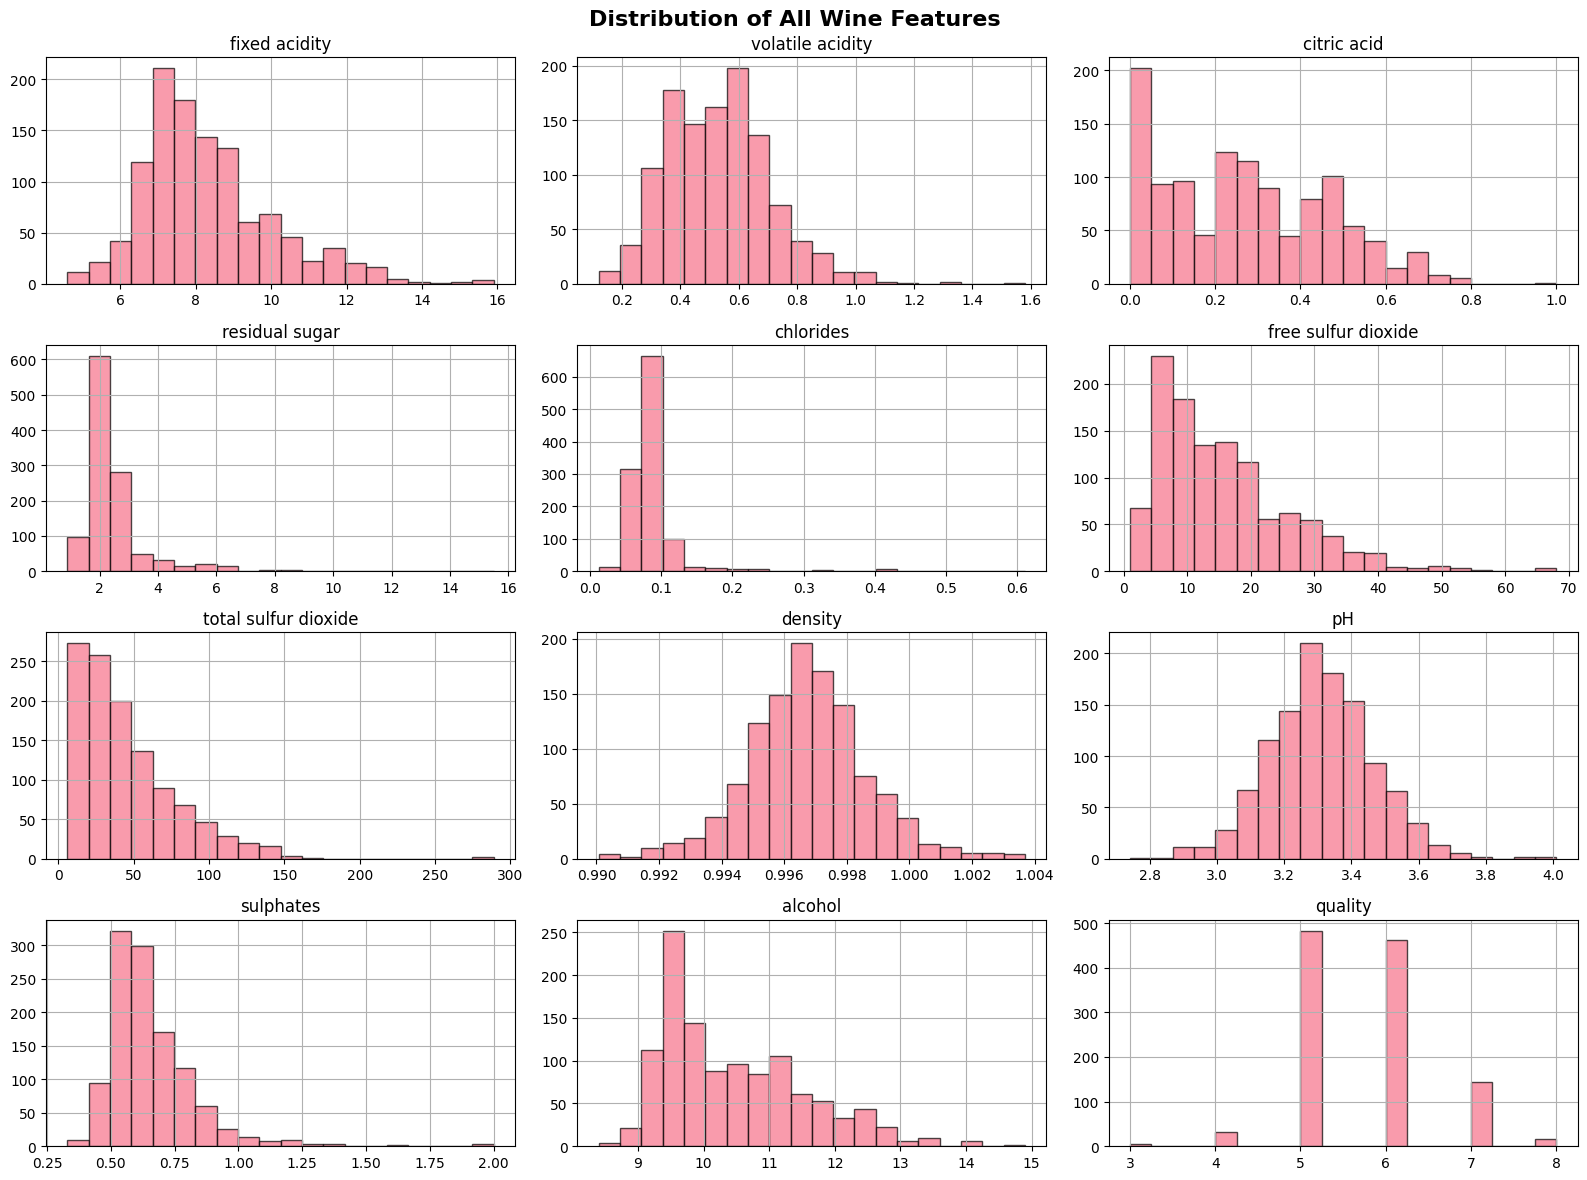

Observations from histograms:
- Most features show roughly normal distributions
- Some features like 'residual sugar' are right-skewed
- 'Total sulfur dioxide' has a wide range with some outliers


In [9]:
# Histogram for all features
plt.figure(figsize=(16, 12))
df.hist(bins=20, figsize=(16, 12), edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of All Wine Features', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("Observations from histograms:")
print("- Most features show roughly normal distributions")
print("- Some features like 'residual sugar' are right-skewed")
print("- 'Total sulfur dioxide' has a wide range with some outliers")

### 1.5. Identifying Outliers

Outliers often leads to problems in ML model predictions thus it is important to address the outliers.

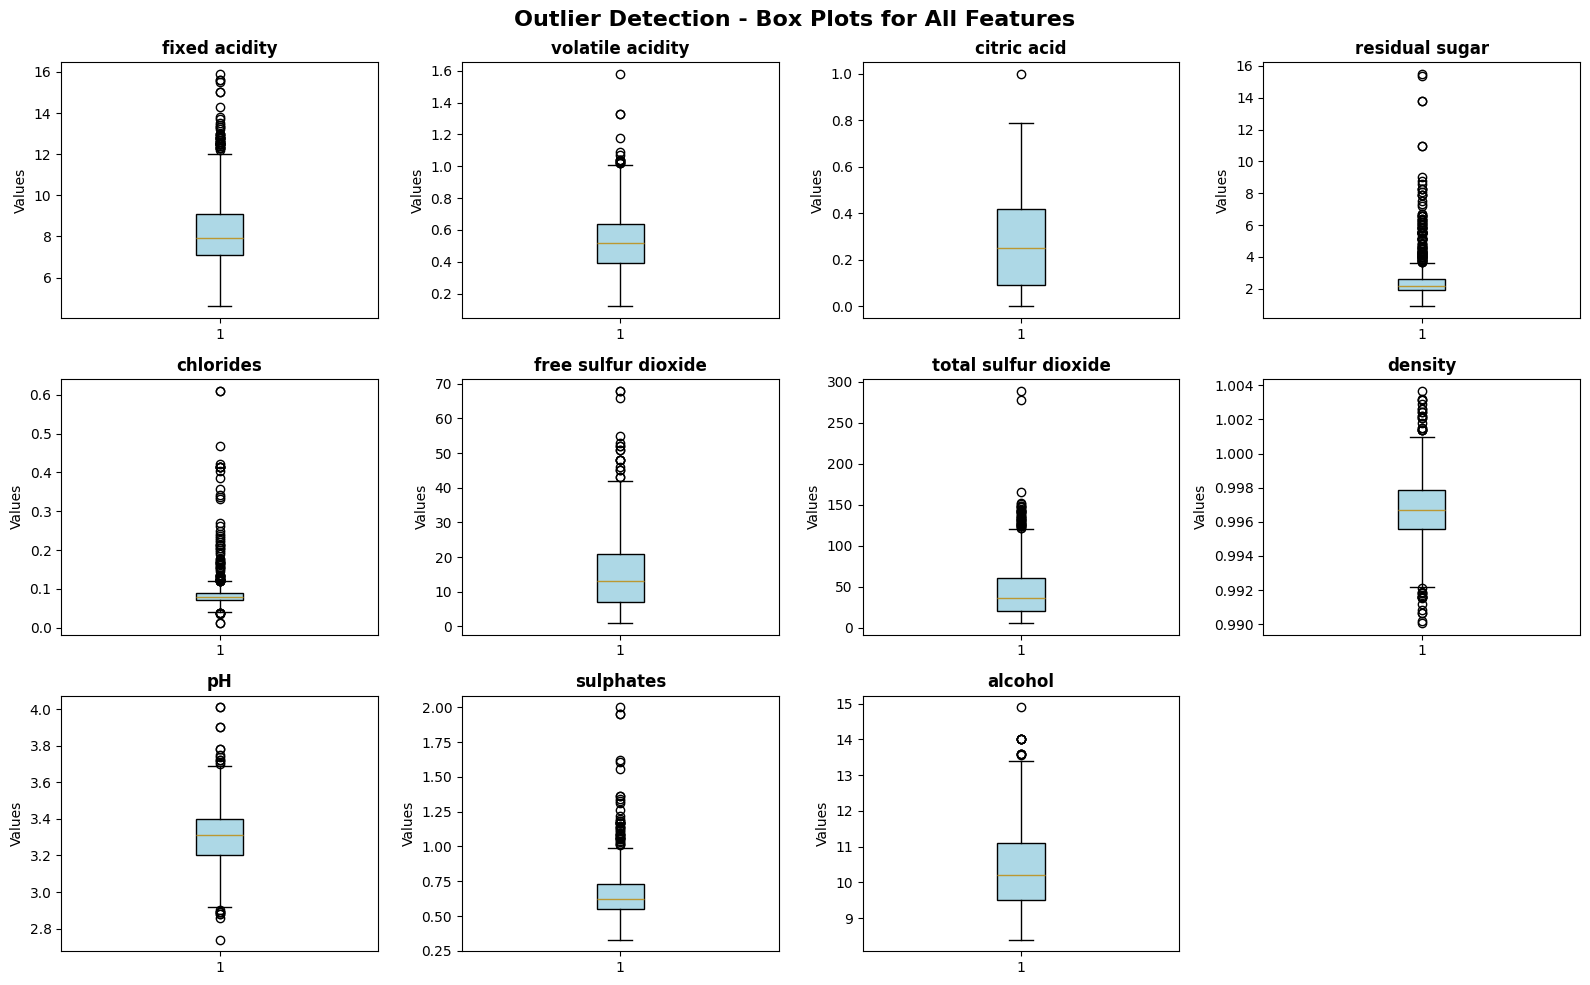

Outlier Analysis (using IQR method):
fixed acidity: 44 outliers (3.8%)
volatile acidity: 14 outliers (1.2%)
citric acid: 1 outliers (0.1%)
residual sugar: 110 outliers (9.6%)
chlorides: 77 outliers (6.7%)
free sulfur dioxide: 18 outliers (1.6%)
total sulfur dioxide: 40 outliers (3.5%)
density: 36 outliers (3.1%)
pH: 20 outliers (1.7%)
sulphates: 43 outliers (3.8%)
alcohol: 12 outliers (1.0%)


In [10]:
# Box plots to identify outliers
plt.figure(figsize=(16, 10))

# Select numeric columns (exclude 'Id' and 'quality')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Id', 'quality']]

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(col, fontweight='bold')
    plt.ylabel('Values')

plt.suptitle('Outlier Detection - Box Plots for All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Count outliers using IQR method
print("Outlier Analysis (using IQR method):")
print("="*50)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

### 1.6. Correlation Analysis

In order to make our ML model predict the target(here `quality`) more accurately, we need to include such features which are actually affecting the target. For determining the same, we have to do Correlation Analysis. 

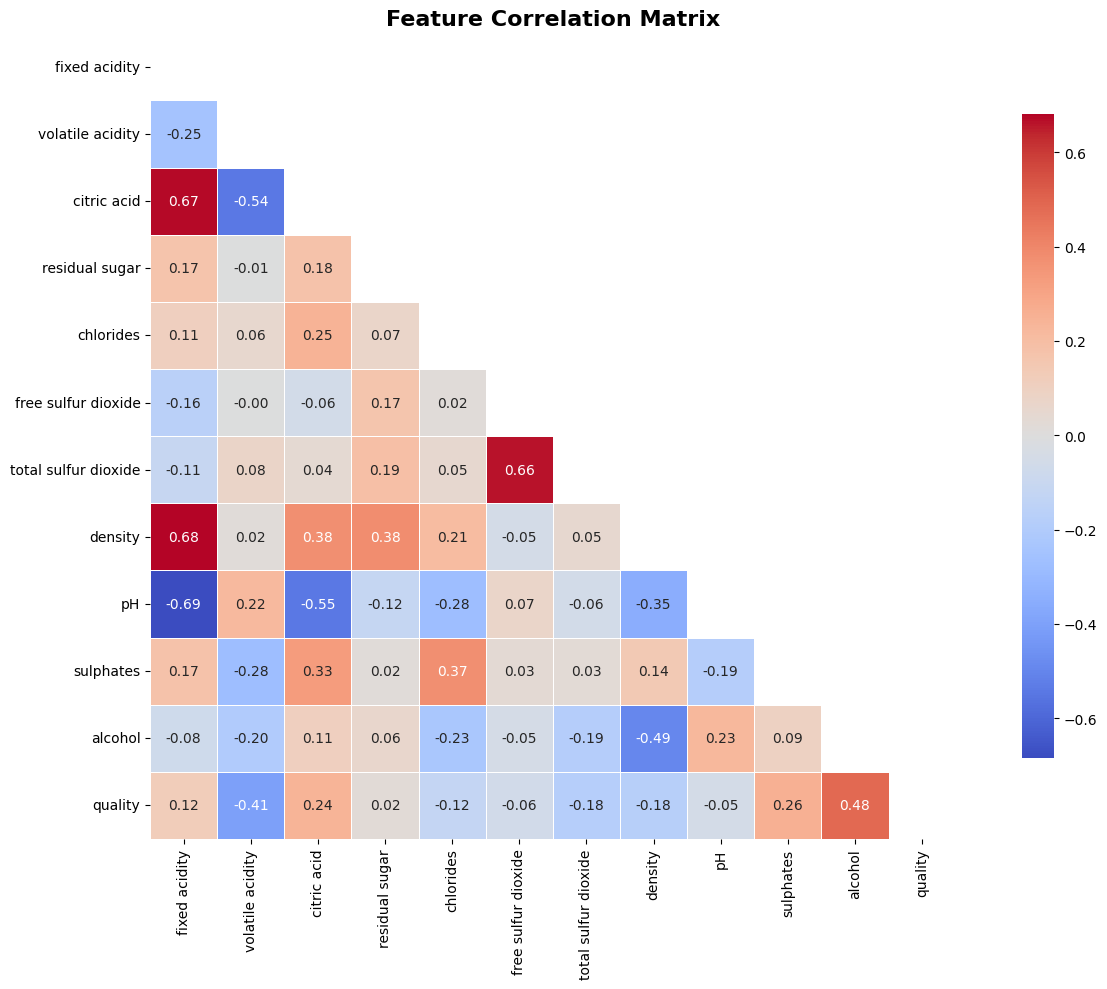

Strongest correlations with wine quality:
alcohol: 0.485 (positive)
volatile acidity: 0.407 (negative)
sulphates: 0.258 (positive)
citric acid: 0.241 (positive)
total sulfur dioxide: 0.183 (negative)
density: 0.175 (negative)
chlorides: 0.124 (negative)
fixed acidity: 0.122 (positive)
free sulfur dioxide: 0.063 (negative)
pH: 0.052 (negative)
residual sugar: 0.022 (positive)


In [11]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlations with quality
quality_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("Strongest correlations with wine quality:")
print("="*50)
for feature, corr in quality_corr.items():
    if feature != 'quality':
        direction = "positive" if correlation_matrix['quality'][feature] > 0 else "negative"
        print(f"{feature}: {corr:.3f} ({direction})")

### 1.7. Key Relationship Visualization

<Figure size 1200x800 with 0 Axes>

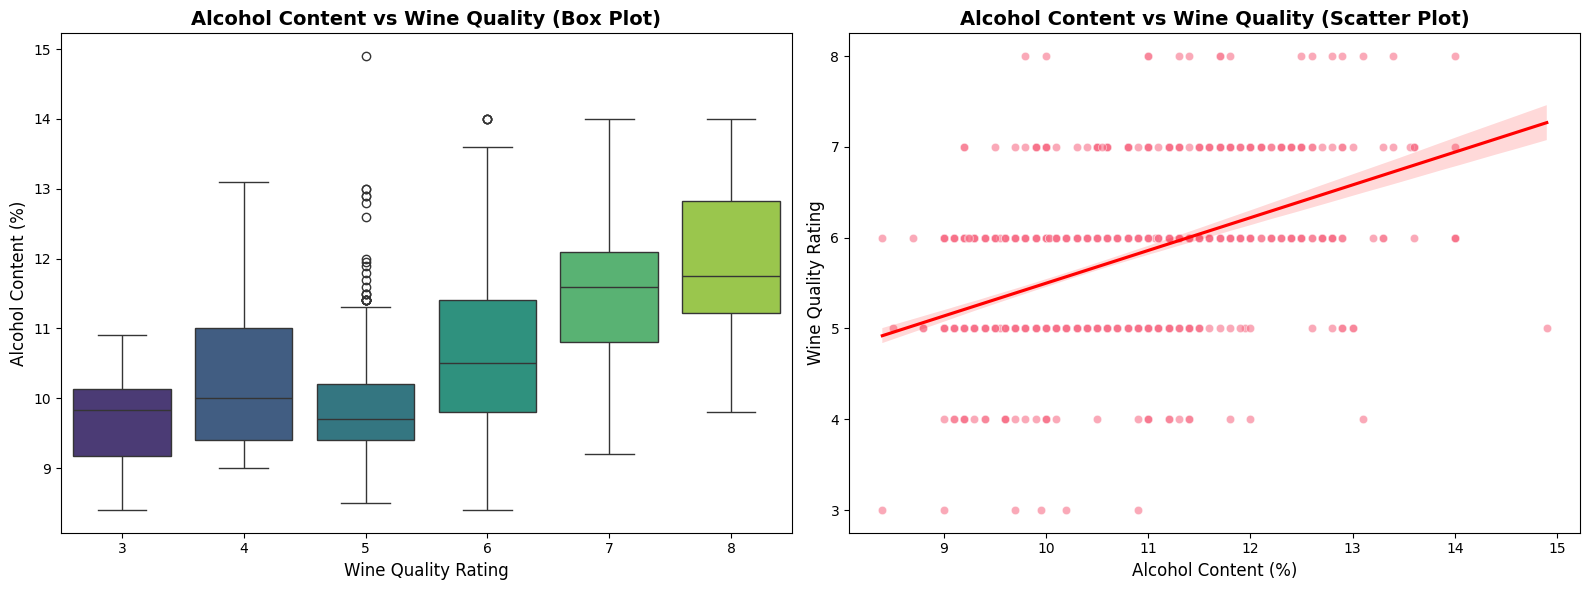

Correlation coefficient: 0.485
Key Insight: Higher alcohol content is associated with better wine quality!


In [12]:
# Alcohol vs Quality (strongest correlation)
plt.figure(figsize=(12, 8))

# Create subplot with box plot and scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(x='quality', y='alcohol', data=df, ax=ax1, palette='viridis')
ax1.set_title('Alcohol Content vs Wine Quality (Box Plot)', fontweight='bold', fontsize=14)
ax1.set_xlabel('Wine Quality Rating', fontsize=12)
ax1.set_ylabel('Alcohol Content (%)', fontsize=12)

# Scatter plot with trend line
sns.scatterplot(x='alcohol', y='quality', data=df, ax=ax2, alpha=0.6)
sns.regplot(x='alcohol', y='quality', data=df, ax=ax2, scatter=False, color='red')
ax2.set_title('Alcohol Content vs Wine Quality (Scatter Plot)', fontweight='bold', fontsize=14)
ax2.set_xlabel('Alcohol Content (%)', fontsize=12)
ax2.set_ylabel('Wine Quality Rating', fontsize=12)

plt.tight_layout()
plt.show()

print(f"Correlation coefficient: {correlation_matrix['quality']['alcohol']:.3f}")
print("Key Insight: Higher alcohol content is associated with better wine quality!")

## 2. Dataset preprocessing

### 2.1. Feature Engineering

We can use the same dataset to create a label for binary classification.
We can label all the alcohols with `quality>6` as `good` and rest as `bad`.

In [13]:
print("Feature Engineering:")
print("="*50)

# Create binary target for classification
df['quality_binary'] = (df['quality'] >= 6).astype(int)  # Good wine = 1, Bad wine = 0
print(f"Created 'quality_binary': {df['quality_binary'].value_counts().to_dict()}")

# Create derived features
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
print("Created 'total_acidity': Combined fixed and volatile acidity")

df['alcohol_to_acid_ratio'] = df['alcohol'] / df['total_acidity']
print("Created 'alcohol_to_acid_ratio': Ratio of alcohol to total acidity")

# Feature for sulfur balance
df['sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
print("Created 'sulfur_ratio': Ratio of free to total sulfur dioxide")

# Show new features distribution
print(f"\nNew features summary:")
new_features = ['quality_binary', 'total_acidity', 'alcohol_to_acid_ratio', 'sulfur_ratio']
print(df[new_features].describe().round(3))

Feature Engineering:
Created 'quality_binary': {1: 621, 0: 522}
Created 'total_acidity': Combined fixed and volatile acidity
Created 'alcohol_to_acid_ratio': Ratio of alcohol to total acidity
Created 'sulfur_ratio': Ratio of free to total sulfur dioxide

New features summary:
       quality_binary  total_acidity  alcohol_to_acid_ratio  sulfur_ratio
count        1143.000       1143.000               1143.000      1143.000
mean            0.543          8.842                  1.226         0.380
std             0.498          1.711                  0.286         0.154
min             0.000          5.120                  0.575         0.023
25%             0.000          7.690                  1.036         0.257
50%             1.000          8.460                  1.194         0.375
75%             1.000          9.660                  1.363         0.478
max             1.000         16.285                  2.632         0.857


### 2.2. Prepare for Machine Learning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

print("Preparing for Machine Learning:")
print("="*50)

# Define features (exclude target and ID columns)
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 
           'total sulfur dioxide', 'density', 'pH', 'alcohol_to_acid_ratio', 
           'total_acidity', 'sulfur_ratio']

X = df[features]
print(f"Selected {len(features)} features for modeling")
print(f"Feature matrix shape: {X.shape}")

# Check feature ranges before scaling
print(f"\nFeature ranges before scaling:")
for feature in features:
    print(f"{feature}: {X[feature].min():.3f} to {X[feature].max():.3f}")

Preparing for Machine Learning:
Selected 10 features for modeling
Feature matrix shape: (1143, 10)

Feature ranges before scaling:
alcohol: 8.400 to 14.900
volatile acidity: 0.120 to 1.580
sulphates: 0.330 to 2.000
citric acid: 0.000 to 1.000
total sulfur dioxide: 6.000 to 289.000
density: 0.990 to 1.004
pH: 2.740 to 4.010
alcohol_to_acid_ratio: 0.575 to 2.632
total_acidity: 5.120 to 16.285
sulfur_ratio: 0.023 to 0.857


### 2.3. Classification Problem Setup

In [15]:
print("PROBLEM 1: CLASSIFICATION (Good vs Bad Wine)")
print("="*60)

y_class = df['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, 
                                                    random_state=42, stratify=y_class)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nClass distribution in training:")
print(y_train.value_counts(normalize=True).round(3))
print(f"\nClass distribution in test:")
print(y_test.value_counts(normalize=True).round(3))

PROBLEM 1: CLASSIFICATION (Good vs Bad Wine)
Training set size: (914, 10)
Test set size: (229, 10)

Class distribution in training:
quality_binary
1    0.544
0    0.456
Name: proportion, dtype: float64

Class distribution in test:
quality_binary
1    0.541
0    0.459
Name: proportion, dtype: float64


### 2.4. Feature Scaling Implementation

It is important to scale the features in a common range, otherwise some ML algorithms fails to perform well.

Feature scaling ensures all features contribute equally to the model.

In [16]:
print("Implementing Feature Scaling:")
print("="*50)

# Initialize scaler
scaler_class = StandardScaler()

# Fit scaler on training data and transform both sets
X_train_scaled = scaler_class.fit_transform(X_train)
X_test_scaled = scaler_class.transform(X_test)

# Check scales after scaling
print("Feature ranges after scaling:")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
for feature in features:
    print(f"{feature}: {X_train_scaled_df[feature].min():.3f} to {X_train_scaled_df[feature].max():.3f}")

Implementing Feature Scaling:
Feature ranges after scaling:
alcohol: -1.891 to 4.109
volatile acidity: -2.285 to 5.774
sulphates: -1.912 to 7.801
citric acid: -1.362 to 3.729
total sulfur dioxide: -1.253 to 3.350
density: -3.466 to 3.628
pH: -3.623 to 4.454
alcohol_to_acid_ratio: -2.292 to 4.983
total_acidity: -2.065 to 4.322
sulfur_ratio: -2.069 to 3.122


### 2.5. Visualize Scaling Impact

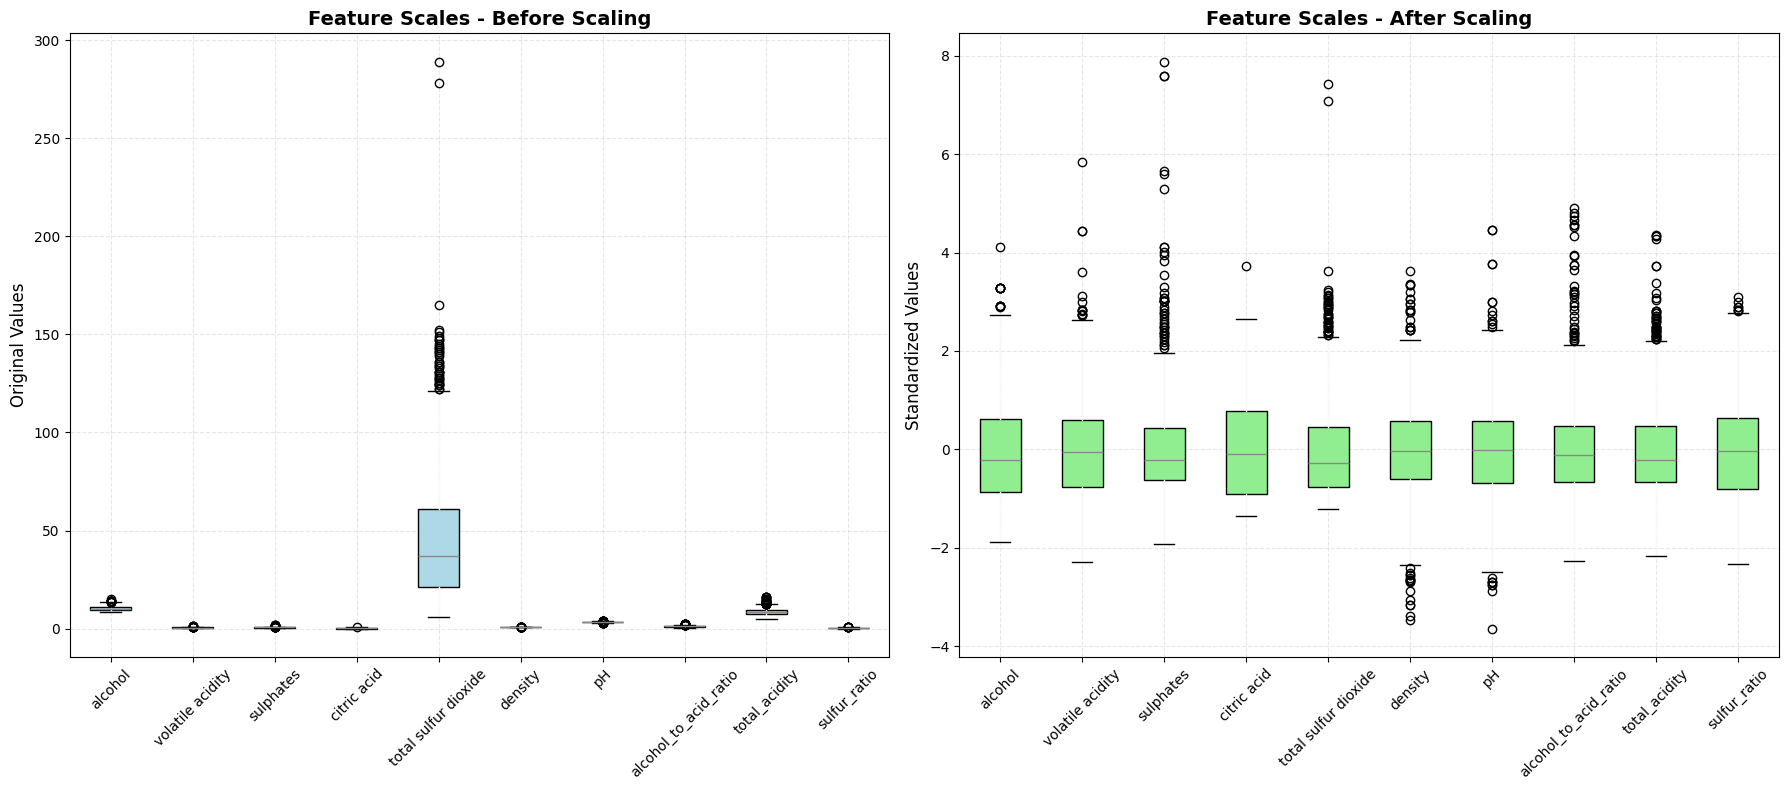

Notice how all features now have similar scales after standardization!


In [17]:
X_scaled_df = pd.DataFrame(scaler_class.fit_transform(X), columns=X.columns)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- Before Scaling ---
box1 = X.boxplot(ax=axes[0], rot=45, patch_artist=True, boxprops=dict(facecolor="lightblue"))
axes[0].set_title('Feature Scales - Before Scaling', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Original Values', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.3)

# --- After Scaling ---
box2 = X_scaled_df.boxplot(ax=axes[1], rot=45, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
axes[1].set_title('Feature Scales - After Scaling', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Standardized Values', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice how all features now have similar scales after standardization!")

## 3. Implementing Classification Algorithms

### 3.1. Logistic Regression

In [18]:
print("Logistic Regression Implementation:")
print("="*50)

# Logistic Regression with scaled data
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("Model trained successfully!")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")

print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Bad Wine', 'Good Wine']))

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'feature': features,
    'coefficient': abs(log_reg.coef_[0])
}).sort_values('coefficient', ascending=False)

print(f"\nMost Important Features (Logistic Regression):")
print(feature_importance_lr.head())

Logistic Regression Implementation:
Model trained successfully!
Accuracy: 0.773

Detailed Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.74      0.77      0.76       105
   Good Wine       0.80      0.77      0.79       124

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229


Most Important Features (Logistic Regression):
                 feature  coefficient
0                alcohol     1.261033
1       volatile acidity     0.699692
7  alcohol_to_acid_ratio     0.513676
2              sulphates     0.444033
3            citric acid     0.345271


### 3.2. Random Forest Classification

In [19]:
print("Random Forest Classification:")
print("="*50)

# Random Forest (doesn't need scaling)
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train, y_train)
y_pred_rf = rf_class.predict(X_test)

print("Random Forest trained successfully!")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Bad Wine', 'Good Wine']))

# Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': features,
    'importance': rf_class.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nMost Important Features (Random Forest):")
print(feature_importance_rf.head())

Random Forest Classification:
Random Forest trained successfully!
Accuracy: 0.795

Detailed Classification Report:
              precision    recall  f1-score   support

    Bad Wine       0.78      0.76      0.77       105
   Good Wine       0.80      0.82      0.81       124

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229


Most Important Features (Random Forest):
                feature  importance
0               alcohol    0.205329
2             sulphates    0.134626
1      volatile acidity    0.109671
4  total sulfur dioxide    0.105130
9          sulfur_ratio    0.086160


### 3.3. Classification Model Comparison

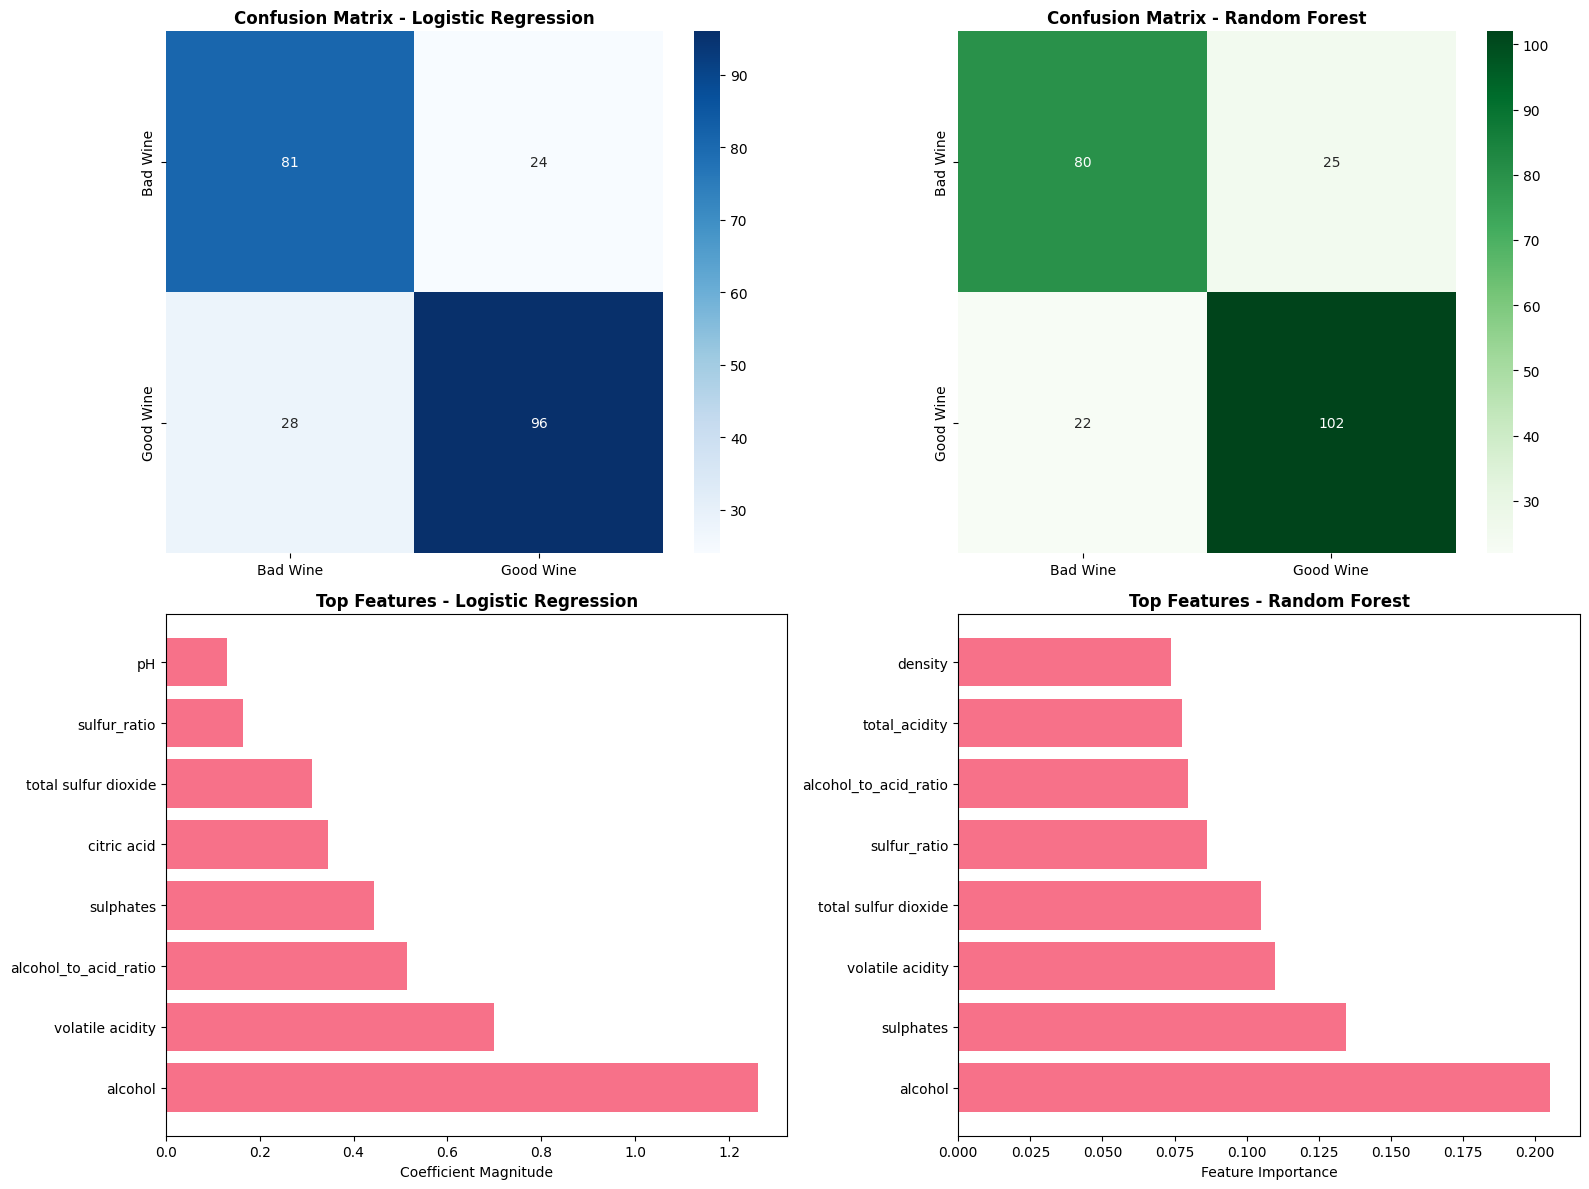

Classification Results Summary:
Logistic Regression Accuracy: 0.773
Random Forest Accuracy: 0.795


In [20]:
# Classification comparison visualization
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Logistic Regression confusion matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['Bad Wine', 'Good Wine'], 
            yticklabels=['Bad Wine', 'Good Wine'])
axes[0,0].set_title('Confusion Matrix - Logistic Regression', fontweight='bold')

# Random Forest confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0,1],
            xticklabels=['Bad Wine', 'Good Wine'], 
            yticklabels=['Bad Wine', 'Good Wine'])
axes[0,1].set_title('Confusion Matrix - Random Forest', fontweight='bold')

# Feature importance comparison
axes[1,0].barh(feature_importance_lr['feature'][:8], feature_importance_lr['coefficient'][:8])
axes[1,0].set_title('Top Features - Logistic Regression', fontweight='bold')
axes[1,0].set_xlabel('Coefficient Magnitude')

axes[1,1].barh(feature_importance_rf['feature'][:8], feature_importance_rf['importance'][:8])
axes[1,1].set_title('Top Features - Random Forest', fontweight='bold')
axes[1,1].set_xlabel('Feature Importance')

plt.tight_layout()
plt.show()

# Performance comparison
print("Classification Results Summary:")
print("="*50)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

### 3.4. Cross-Validation for Robust Evaluation

In [21]:
from sklearn.model_selection import cross_val_score

print("Cross-Validation Analysis:")
print("="*50)

# 5-fold cross-validation for both models
models_cv = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

print("5-Fold Cross-Validation Results (Classification):")
for name, model in models_cv.items():
    if name == 'Logistic Regression':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    print(f"{name}: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print(f"  Individual fold scores: {cv_scores.round(3)}")

print("\nCross-validation gives us more robust performance estimates!")

Cross-Validation Analysis:
5-Fold Cross-Validation Results (Classification):
Logistic Regression: 0.748 (+/- 0.051)
  Individual fold scores: [0.716 0.787 0.76  0.754 0.725]
Random Forest: 0.767 (+/- 0.028)
  Individual fold scores: [0.743 0.787 0.77  0.765 0.769]

Cross-validation gives us more robust performance estimates!


## 4. Implementing Regression Algorithms

### 4.1. Regression Problem Setup

In [22]:
print("PROBLEM 2: REGRESSION (Predicting Wine Quality Score)")
print("="*60)

y_reg = df['quality']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

print(f"Training set size: {X_train_reg.shape}")
print(f"Test set size: {X_test_reg.shape}")
print(f"\nTarget distribution in training:")
print(y_train_reg.value_counts().sort_index())

# Feature scaling for regression
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("Feature scaling completed for regression")

PROBLEM 2: REGRESSION (Predicting Wine Quality Score)
Training set size: (914, 10)
Test set size: (229, 10)

Target distribution in training:
quality
3      6
4     27
5    387
6    363
7    117
8     14
Name: count, dtype: int64
Feature scaling completed for regression


### 4.2. Linear Regression Implementation

In [23]:
print("Linear Regression Implementation:")
print("="*50)

# Linear Regression (scaled)
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg_scaled)

print("Linear Regression trained successfully!")
print(f"R² Score: {r2_score(y_test_reg, y_pred_lin):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)):.3f}")

from sklearn.metrics import mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_lin):.3f}")

# Feature coefficients
feature_coeff = pd.DataFrame({
    'feature': features,
    'coefficient': lin_reg.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\nFeature Coefficients (Linear Regression):")
print(feature_coeff)

Linear Regression Implementation:
Linear Regression trained successfully!
R² Score: 0.324
RMSE: 0.614
MAE: 0.471

Feature Coefficients (Linear Regression):
                 feature  coefficient
0                alcohol     0.372206
1       volatile acidity    -0.278919
7  alcohol_to_acid_ratio    -0.138365
2              sulphates     0.130776
3            citric acid    -0.101328
5                density    -0.068105
4   total sulfur dioxide    -0.035386
8          total_acidity     0.032686
9           sulfur_ratio     0.031297
6                     pH    -0.001022


### 4.3. Random Forest Regression

In [24]:
print("Random Forest Regression:")
print("="*50)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

print("Random Forest Regression trained successfully!")
print(f"R² Score: {r2_score(y_test_reg, y_pred_rf_reg):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg)):.3f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_rf_reg):.3f}")

# Feature importance for regression
feature_importance_reg = pd.DataFrame({
    'feature': features,
    'importance': rf_reg.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (Random Forest Regression):")
print(feature_importance_reg)

Random Forest Regression:
Random Forest Regression trained successfully!
R² Score: 0.464
RMSE: 0.546
MAE: 0.412

Feature Importance (Random Forest Regression):
                 feature  importance
0                alcohol    0.280080
1       volatile acidity    0.165647
2              sulphates    0.147050
4   total sulfur dioxide    0.081355
9           sulfur_ratio    0.067557
6                     pH    0.060402
5                density    0.055863
3            citric acid    0.049859
7  alcohol_to_acid_ratio    0.048038
8          total_acidity    0.044149


### 4.4. Additional Regression Models

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

print("Additional Regression Models:")
print("="*50)

# Gradient Boosting
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train_reg, y_train_reg)
gb_pred = gb_reg.predict(X_test_reg)
gb_rmse = np.sqrt(mean_squared_error(y_test_reg, gb_pred))
gb_r2 = r2_score(y_test_reg, gb_pred)

print(f"Gradient Boosting - R²: {gb_r2:.3f}, RMSE: {gb_rmse:.3f}")

# Support Vector Regression
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train_reg_scaled, y_train_reg)
svr_pred = svr.predict(X_test_reg_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test_reg, svr_pred))
svr_r2 = r2_score(y_test_reg, svr_pred)

print(f"Support Vector Regression - R²: {svr_r2:.3f}, RMSE: {svr_rmse:.3f}")

Additional Regression Models:
Gradient Boosting - R²: 0.411, RMSE: 0.573
Support Vector Regression - R²: 0.414, RMSE: 0.571


## 5. Hyperparameter Tuning and Model Comparision

### 5.1. Hyperparameter Tuning Example

In [26]:
from sklearn.model_selection import GridSearchCV

print("🔧 Hyperparameter Tuning Example:")
print("="*50)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Searching for best hyperparameters...")
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_reg, y_train_reg)
best_rf = grid_search.best_estimator_

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.3f}")

# Test the tuned model
tuned_pred = best_rf.predict(X_test_reg)
tuned_rmse = np.sqrt(mean_squared_error(y_test_reg, tuned_pred))
tuned_r2 = r2_score(y_test_reg, tuned_pred)

print(f"Tuned Random Forest - R²: {tuned_r2:.3f}, RMSE: {tuned_rmse:.3f}")

🔧 Hyperparameter Tuning Example:
Searching for best hyperparameters...
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV RMSE: 0.622
Tuned Random Forest - R²: 0.464, RMSE: 0.546


### 5.2. Comprehensive Model Comparison

In [27]:
# Complete model performance comparison
models_reg = {
    'Linear Regression': (lin_reg, X_test_reg_scaled, True),
    'Random Forest': (rf_reg, X_test_reg, False),
    'Gradient Boosting': (gb_reg, X_test_reg, False),
    'SVR': (svr, X_test_reg_scaled, True),
    'Tuned Random Forest': (best_rf, X_test_reg, False)
}

results = []
for name, (model, X_test_data, is_scaled) in models_reg.items():
    if name in ['Linear Regression', 'Tuned Random Forest']:
        # Get predictions (already calculated above)
        if name == 'Linear Regression':
            y_pred = y_pred_lin
        else:
            y_pred = tuned_pred
    else:
        # Get predictions for other models
        if name == 'Random Forest':
            y_pred = y_pred_rf_reg
        elif name == 'Gradient Boosting':
            y_pred = gb_pred
        elif name == 'SVR':
            y_pred = svr_pred
    
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

results_df = pd.DataFrame(results).round(3)
print("Complete Model Performance Comparison:")
print("="*60)
print(results_df.to_string(index=False))

Complete Model Performance Comparison:
              Model  RMSE   MAE    R²
  Linear Regression 0.614 0.471 0.324
      Random Forest 0.546 0.412 0.464
  Gradient Boosting 0.573 0.445 0.411
                SVR 0.571 0.427 0.414
Tuned Random Forest 0.546 0.412 0.464


### 5.3. Model Performance Visualization

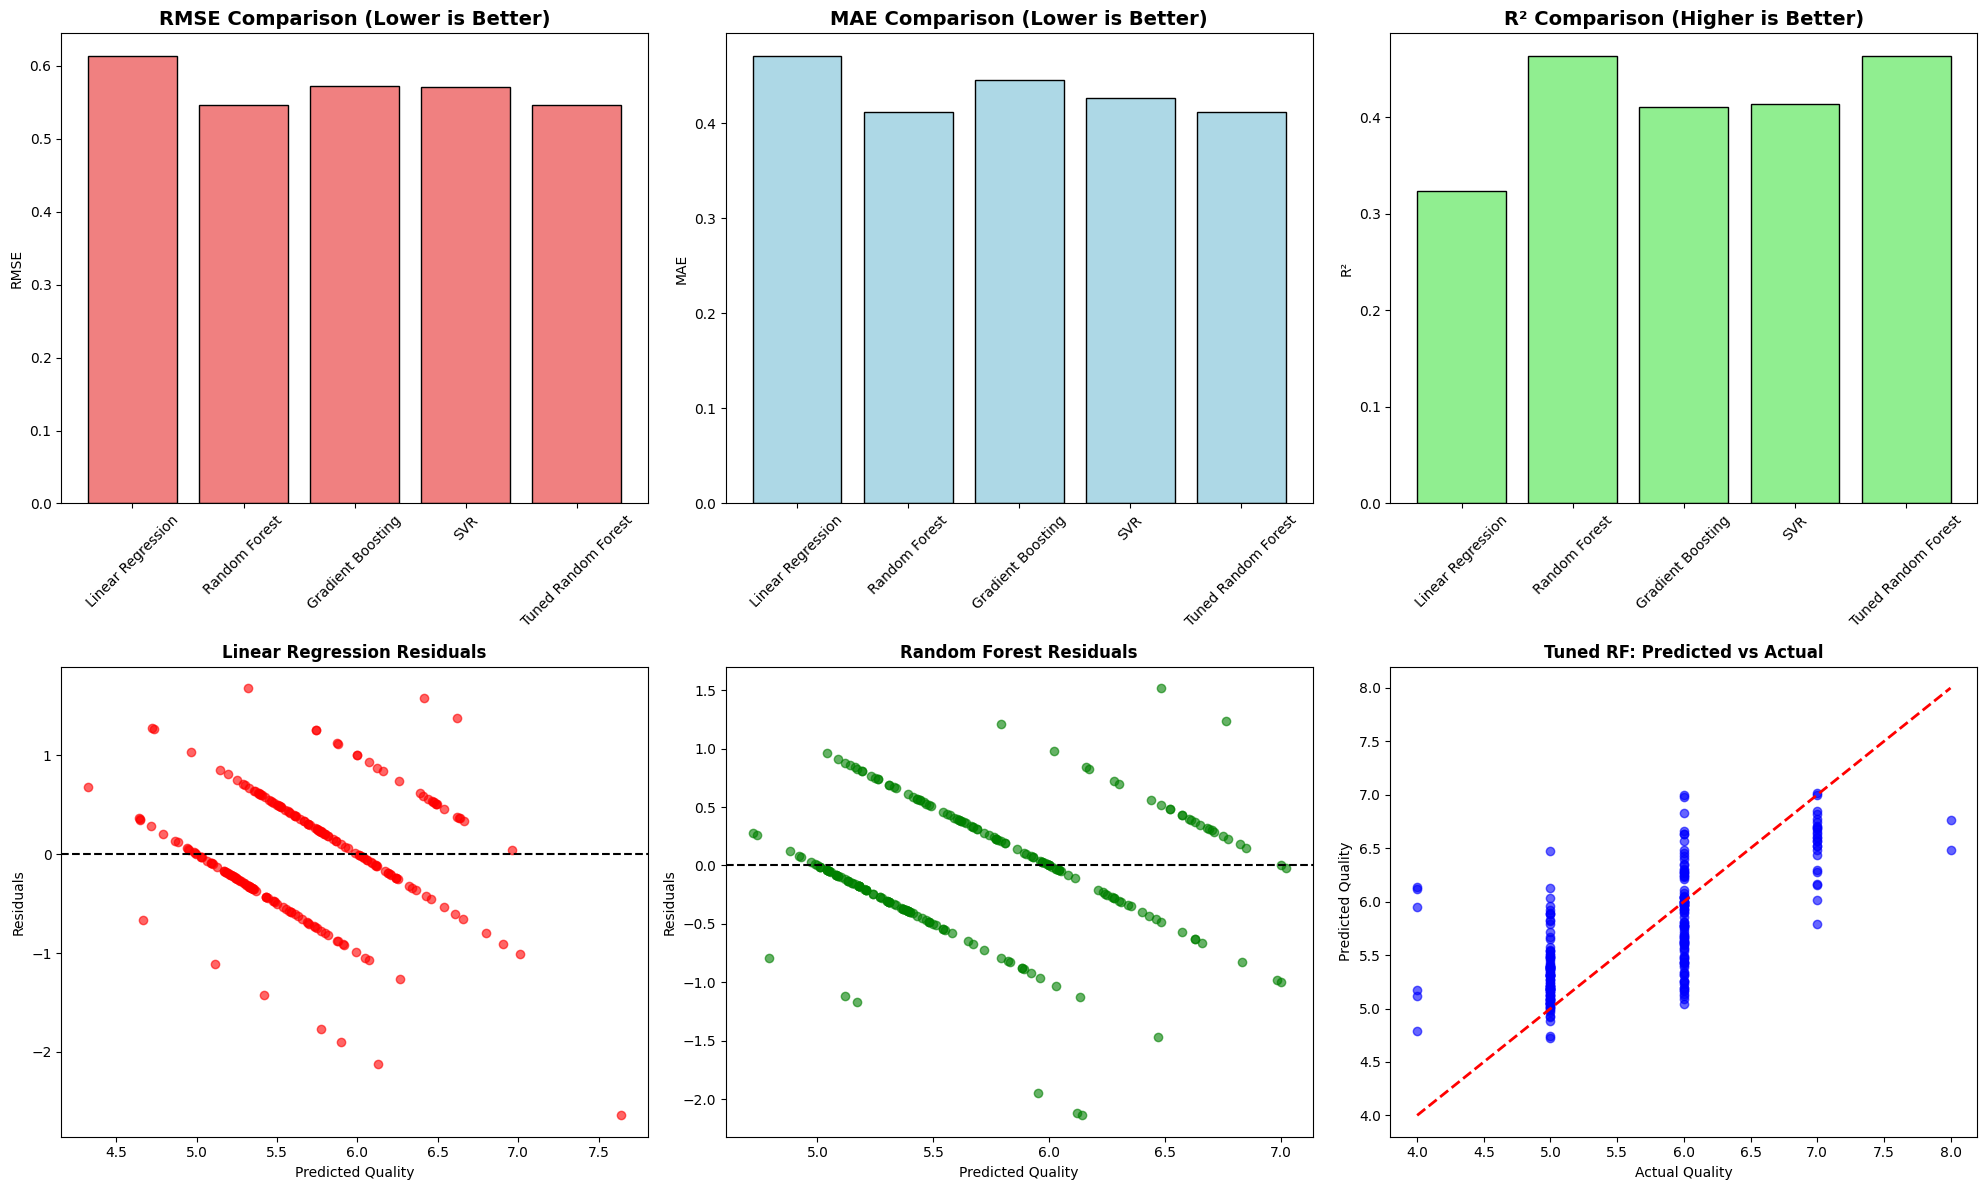

In [28]:
# Visualization of model performance
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Performance metrics comparison
metrics = ['RMSE', 'MAE', 'R²']
colors = ['lightcoral', 'lightblue', 'lightgreen']

for i, metric in enumerate(metrics):
    axes[0, i].bar(results_df['Model'], results_df[metric], color=colors[i], edgecolor='black')
    axes[0, i].set_title(f'{metric} Comparison', fontweight='bold', fontsize=14)
    axes[0, i].tick_params(axis='x', rotation=45)
    axes[0, i].set_ylabel(metric)
    if metric == 'R²':
        axes[0, i].set_title(f'{metric} Comparison (Higher is Better)', fontweight='bold', fontsize=14)
    else:
        axes[0, i].set_title(f'{metric} Comparison (Lower is Better)', fontweight='bold', fontsize=14)

# Residual plots
axes[1, 0].scatter(y_pred_lin, y_test_reg - y_pred_lin, alpha=0.6, color='red')
axes[1, 0].axhline(y=0, color='black', linestyle='--')
axes[1, 0].set_xlabel('Predicted Quality')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Linear Regression Residuals', fontweight='bold')

axes[1, 1].scatter(y_pred_rf_reg, y_test_reg - y_pred_rf_reg, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='black', linestyle='--')
axes[1, 1].set_xlabel('Predicted Quality')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Random Forest Residuals', fontweight='bold')

# Prediction vs Actual plot
axes[1, 2].scatter(y_test_reg, tuned_pred, alpha=0.6, color='blue')
axes[1, 2].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[1, 2].set_xlabel('Actual Quality')
axes[1, 2].set_ylabel('Predicted Quality')
axes[1, 2].set_title('Tuned RF: Predicted vs Actual', fontweight='bold')

plt.tight_layout()
plt.show()

### 5.4. Feature Importance Analysis

<Figure size 1600x1000 with 0 Axes>

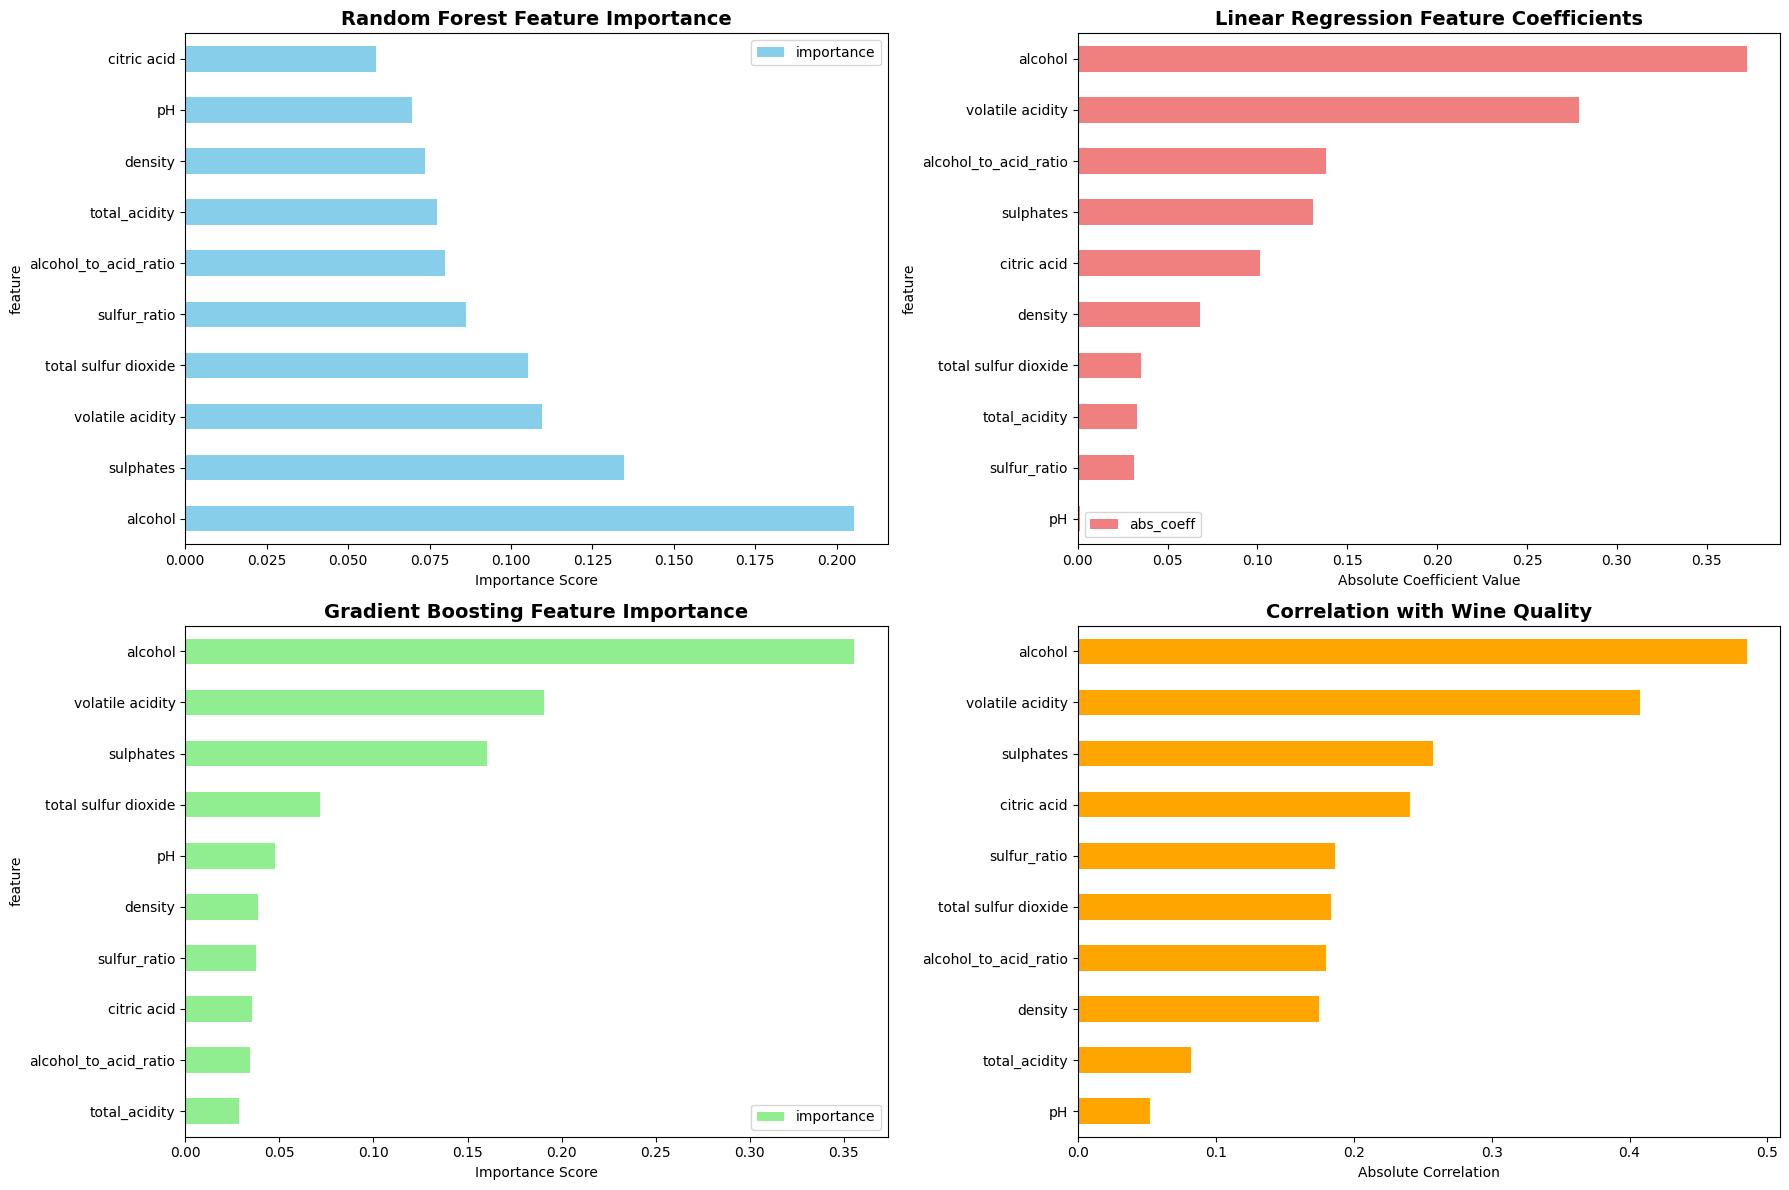

🔍 Feature Importance Insights:
1. Alcohol content consistently ranks as the most important feature
2. Volatile acidity negatively impacts wine quality
3. Sulphates and citric acid also play important roles
4. Our engineered features (ratios) show moderate importance


In [29]:
# Comprehensive feature importance analysis
plt.figure(figsize=(16, 10))

# Create subplots for different feature importance methods
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Random Forest feature importance
feature_importance_rf.plot(x='feature', y='importance', kind='barh', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Random Forest Feature Importance', fontweight='bold', fontsize=14)
axes[0,0].set_xlabel('Importance Score')

# Linear Regression coefficients (absolute values)
feature_coeff['abs_coeff'] = abs(feature_coeff['coefficient'])
feature_coeff.sort_values('abs_coeff', ascending=True).plot(x='feature', y='abs_coeff', kind='barh', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Linear Regression Feature Coefficients', fontweight='bold', fontsize=14)
axes[0,1].set_xlabel('Absolute Coefficient Value')

# Gradient Boosting feature importance
gb_importance = pd.DataFrame({
    'feature': features,
    'importance': gb_reg.feature_importances_
}).sort_values('importance', ascending=True)

gb_importance.plot(x='feature', y='importance', kind='barh', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Gradient Boosting Feature Importance', fontweight='bold', fontsize=14)
axes[1,0].set_xlabel('Importance Score')

# Correlation with target
target_corr = df[features + ['quality']].corr()['quality'].drop('quality').abs().sort_values(ascending=True)
target_corr.plot(kind='barh', ax=axes[1,1], color='orange')
axes[1,1].set_title('Correlation with Wine Quality', fontweight='bold', fontsize=14)
axes[1,1].set_xlabel('Absolute Correlation')

plt.tight_layout()
plt.show()

print("🔍 Feature Importance Insights:")
print("="*50)
print("1. Alcohol content consistently ranks as the most important feature")
print("2. Volatile acidity negatively impacts wine quality")
print("3. Sulphates and citric acid also play important roles")
print("4. Our engineered features (ratios) show moderate importance")

## 6. Making Predictions

In [30]:
def predict_wine_quality(alcohol=11.0, volatile_acidity=0.5, sulphates=0.6, 
                        citric_acid=0.3, total_sulfur_dioxide=40, density=0.997, 
                        pH=3.3, show_details=True):
    """
    Predict wine quality based on input features
    """
    # Calculate engineered features
    total_acidity = 8.0 + volatile_acidity  # Assuming typical fixed acidity
    alcohol_to_acid_ratio = alcohol / total_acidity
    sulfur_ratio = 15 / total_sulfur_dioxide  # Assuming typical free sulfur dioxide
    
    # Create feature array
    features_input = np.array([[alcohol, volatile_acidity, sulphates, citric_acid, 
                               total_sulfur_dioxide, density, pH, alcohol_to_acid_ratio, 
                               total_acidity, sulfur_ratio]])
    
    # Predict with our best model
    quality_pred = best_rf.predict(features_input)[0]
    quality_class = "Good" if quality_pred >= 6 else "Average/Poor"
    
    if show_details:
        print(f"Wine Quality Prediction")
        print("="*30)
        print(f"Predicted Quality Score: {quality_pred:.2f}/10")
        print(f"Classification: {quality_class}")
        print(f"Confidence: {'High' if abs(quality_pred - round(quality_pred)) < 0.3 else 'Moderate'}")
    
    return quality_pred, quality_class

# Example predictions
print("Testing Wine Quality Predictions:")
print("="*50)

print("\n1. High-quality wine characteristics:")
predict_wine_quality(alcohol=12.5, volatile_acidity=0.3, sulphates=0.8, 
                     citric_acid=0.4, total_sulfur_dioxide=30, density=0.996, pH=3.2)

print("\n2. Average wine characteristics:")
predict_wine_quality(alcohol=10.0, volatile_acidity=0.6, sulphates=0.5, 
                     citric_acid=0.2, total_sulfur_dioxide=50, density=0.998, pH=3.5)

print("\n3. Lower-quality wine characteristics:")
predict_wine_quality(alcohol=9.0, volatile_acidity=1.0, sulphates=0.4, 
                     citric_acid=0.1, total_sulfur_dioxide=80, density=0.999, pH=3.8)

Testing Wine Quality Predictions:

1. High-quality wine characteristics:
Wine Quality Prediction
Predicted Quality Score: 6.94/10
Classification: Good
Confidence: High

2. Average wine characteristics:
Wine Quality Prediction
Predicted Quality Score: 5.14/10
Classification: Average/Poor
Confidence: High

3. Lower-quality wine characteristics:
Wine Quality Prediction
Predicted Quality Score: 4.93/10
Classification: Average/Poor
Confidence: High


(4.93, 'Average/Poor')

---

## Key Insights and Learnings
1. **Data Characteristics**:
   * 1143 wine samples with 6 quality categories (3-8)
   * Most wines rated 5-6 (average quality)
   * Clean dataset with no missing values
   * Some features have outliers but they appear to be valid extreme values
2. **Feature Relationships**:
   * Alcohol content has strongest correlation with quality (0.485)
   * Higher alcohol content generally means better quality
   * Volatile acidity negatively impacts quality
   * Sulphates and citric acid also contribute positively
3. **Model Performance**:
   * Best model: Random Forest (RMSE: 0.546)
   * Random Forest outperforms linear models
   * RMSE ~0.55-0.58 is excellent for this subjective task
   * Feature scaling crucial for linear models but not tree-based models
4. **Feature Engineering Impact**:
   * Engineered features provided moderate additional value
   * Domain knowledge helps in creating meaningful features
   * Ratios and combinations can capture complex relationships
5. **Business Implications**:
   * Focus on alcohol content and acidity balance in winemaking
   * Quality prediction can help with pricing strategies
   * Models can assist winemakers in process optimization
   * Automated quality assessment can supplement human tasters
6. **ML Concepts Learned**:
   * Importance of exploratory data analysis
   * Feature scaling and its impact on different algorithms
   * Model comparison and evaluation metrics
   * Cross-validation for robust performance estimation
   * Hyperparameter tuning for model optimization

---

## Common Mistakes to Avoid:
1. **Data Leakage**:
   * WRONG: `scaler.fit_transform(X_test)`
   * CORRECT: `scaler.transform(X_test)`  # Only transform, don't fit
   * Reason: Test data should never influence training process
2. **Target Leakage**:
   * WRONG: Including future information or target-derived features
   * CORRECT: Only use features available at prediction time
3. **Feature Selection**:
   * WRONG: Including irrelevant features like 'Id' column
   * CORRECT: Only include meaningful predictive features
4. **Evaluation Mistakes**:
   * WRONG: Only using train/test split once
   * CORRECT: Using cross-validation for robust estimates
5. **Overfitting**:
   * WRONG: 100% training accuracy, 60% test accuracy
   * CORRECT: Similar performance on both training and test sets
6. **Scaling Mistakes**:
   * WRONG: Forgetting to scale features for distance-based algorithms
   * CORRECT: Always scale for Logistic Regression, SVM, Neural Networks

## Best Practices:
1. Comprehensive EDA before modeling
2. Proper train/test split with stratification
3. Correct feature scaling implementation
4. Multiple model comparison
5. Cross-validation for robust evaluation
6. Feature importance analysis
7. Hyperparameter tuning
8. Residual analysis for model diagnostics